<span style =color:red>**1.Import essential libraries**</span>


In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<span style =color:red>**2.Load the dataset and review dataset**</span>

In [2]:
df=pd.read_csv('vgsales.csv')

In [3]:
df.shape

(16598, 11)

In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<span style =color:red>**2.Check data integrity**</span>

**a).missing value**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum(axis=0)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

We can see that the columns of Platform, Publisher have the null values.

How can we deal with missing value in this specific case ?\
1.<span style=color:blue>Deleting</span>:Simply drop row with the null value, this method fits the scenorio that the total number of null values is relatively small\ than total number of rows\

2.<span style=color:blue>Imputation</span>:Replace missing value with the certain measurements, like mean of the column or the median of the column.\

3.<span style=color:blue>Advanced ML algorithm</span>:There are algorithms that can be made robust to missing data, \such as k-Nearest Neighbors that can ignore a column from a distance measure when a value is missing. Naive Bayes can\ also support missing values when making a prediction


[This is a website reference](https://machinelearningmastery.com/handle-missing-data-python/)

Solution in this specific case:


Since there are 271 missing values in the column of Year and 58 missing value in Publisher compare to 16598 total 
number of rows, which is relatively small and may lead relatively small effect for the whole dataset using deletion 
method. Futhermore, we may also consider how to trade off the accurancy and efficency, in this case, drop the null 
value rows may be the most efficient way without hurting significant accurancy.

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isnull().sum(axis=0)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**b).duplicate rows**

In [10]:
df=df.astype({"Year":'str'})

In [11]:
column_names=['Year','Publisher','Name','Platform','Genre']
dup=df.duplicated(subset=column_names,keep=False)
df[dup]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01


We found that there were two duplicate rows with the same name,platform,year,genre,publisher, so we decided to duplicate rows and merge the corresponding sales data.

In [12]:
df=df.groupby(by=column_names).agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})

In [13]:
df.reset_index(inplace=True)

In [14]:
df[(df['Name']=='Madden NFL 13')& (df['Platform']=='PS3')]

,Year,Publisher,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13735,2012.0,Electronic Arts,Madden NFL 13,PS3,Sports,2.11,0.24,0.0,0.22,2.57


We can see that the duplicated row disappered and the sales data was merged.

**c.)Categorical variable consistency**

In [15]:
df['Platform'].unique()

array(['2600', 'NES', 'PC', 'DS', 'GB', 'SNES', 'GEN', 'GG', 'NG', 'SCD',
       'SAT', 'PS', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2',
       'GBA', 'XB', 'GC', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV',
       'WiiU', 'PS4', 'XOne'], dtype=object)

In [16]:
df.groupby(by='Genre').count()

,Year,Publisher,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,,,
Action,3251,3251,3251,3251,3251,3251,3251,3251,3251
Adventure,1274,1274,1274,1274,1274,1274,1274,1274,1274
Fighting,836,836,836,836,836,836,836,836,836
Misc,1686,1686,1686,1686,1686,1686,1686,1686,1686
Platform,875,875,875,875,875,875,875,875,875
Puzzle,570,570,570,570,570,570,570,570,570
Racing,1225,1225,1225,1225,1225,1225,1225,1225,1225
Role-Playing,1470,1470,1470,1470,1470,1470,1470,1470,1470
Shooter,1282,1282,1282,1282,1282,1282,1282,1282,1282


There is no data consistency on categarical variable

**d.) Uniformaity**


In [17]:
df.head()

,Year,Publisher,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,Activision,Boxing,2600,Fighting,0.72,0.04,0.0,0.01,0.77
1,1980.0,Activision,Bridge,2600,Misc,0.25,0.02,0.0,0.00,0.27
2,1980.0,Activision,Freeway,2600,Action,0.32,0.02,0.0,0.00,0.34
3,1980.0,Activision,Ice Hockey,2600,Sports,0.46,0.03,0.0,0.01,0.49
4,1980.0,Activision,Kaboom!,2600,Misc,1.07,0.07,0.0,0.01,1.15


We can find that Year column should be integers rather than for example 1980.0

In [33]:
df['year']=df['Year'].str[0:4]
df.drop(columns='Year',inplace=True)

In [34]:
df.head()

,Publisher,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year
0,Activision,Boxing,2600,Fighting,0.72,0.04,0.0,0.01,0.77,1980
1,Activision,Bridge,2600,Misc,0.25,0.02,0.0,0.00,0.27,1980
2,Activision,Freeway,2600,Action,0.32,0.02,0.0,0.00,0.34,1980
3,Activision,Ice Hockey,2600,Sports,0.46,0.03,0.0,0.01,0.49,1980
4,Activision,Kaboom!,2600,Misc,1.07,0.07,0.0,0.01,1.15,1980


<span style=color:red>**3.Data manipulation and visulization**</span>

topic 1. The most popular platform and genre and game in the specific year

In [86]:
def mp_pf_gn_gm_year(year):
    mp_pf=df.groupby(by=['Platform','year'])['Global_Sales'].sum().to_frame().reset_index()
    mp_pf_d=mp_pf[mp_pf['year']==str(year)].sort_values('Global_Sales',ascending=False)
    mp_gn=df.groupby(by=['Genre','year'])['Global_Sales'].sum().to_frame().reset_index()
    mp_gn_d=mp_gn[mp_gn['year']==str(year)].sort_values('Global_Sales',ascending=False)
    mp_gm=df.groupby(by=['Name','year'])['Global_Sales'].sum().to_frame().reset_index()
    mp_gm_d=mp_gm[mp_gm['year']==str(year)].sort_values('Global_Sales',ascending=False)
    print('The most popular game in',year,'is',mp_gm_d.iloc[0,0] ,'with',round(mp_gm_d.iloc[0,2],2),'millions global sales')
    print('The most popular platform in',year,'is',mp_pf_d.iloc[0,0] ,'with',round(mp_pf_d.iloc[0,2],2),'millions global sales')
    print('The most popular genre in',year,'is',mp_gn_d.iloc[0,0], 'with',round(mp_gn_d.iloc[0,2],2),'millions global sales')

In [87]:
mp_pf_gn_gm_year(2016)

The most popular game in 2016 is FIFA 17 with 6.91 millions global sales
The most popular platform in 2016 is PS4 with 39.25 millions global sales
The most popular genre in 2016 is Action with 19.9 millions global sales


topic 2. Market insights by continents and country (North America,Europe,Japan and others) in the specific year

In [92]:
def market_insights():
    location=input('Please choose from North America,Europe,Japan and others')
    year=input('Please enter a specif year in the format of 19XX or 20XX')
    if location=='North America':
        loc='NA_Sales'
    elif location=='Europe':
        loc='EU_Sales'
    elif location=='Japan':
        loc='JP_Sales'
    else:
        loc='Other_Sales'
    mp_pf=df.groupby(by=['Platform','year'])[loc].sum().to_frame().reset_index()
    mp_pf_d=mp_pf[mp_pf['year']==str(year)].sort_values(loc,ascending=False)
    mp_gn=df.groupby(by=['Genre','year'])[loc].sum().to_frame().reset_index()
    mp_gn_d=mp_gn[mp_gn['year']==str(year)].sort_values(loc,ascending=False)
    mp_gm=df.groupby(by=['Name','year'])[loc].sum().to_frame().reset_index()
    mp_gm_d=mp_gm[mp_gm['year']==str(year)].sort_values(loc,ascending=False)
    print('The most popular game in',location,'market in',year,'is',mp_gm_d.iloc[0,0] ,'with',round(mp_gm_d.iloc[0,2],2),'millions global sales')
    print('The most popular platform in',location,'market in',year,'is',mp_pf_d.iloc[0,0] ,'with',round(mp_pf_d.iloc[0,2],2),'millions global sales')
    print('The most popular genre in',location,'market in',year,'is',mp_gn_d.iloc[0,0], 'with',round(mp_gn_d.iloc[0,2],2),'millions global sales')
        

In [93]:
market_insights()

Please choose from North America,Europe,Japan and othersOthers
Please enter a specif year in the format of 19XX or 20XX2001
The most popular game in Others market in 2001 is Grand Theft Auto III with 1.3 millions global sales
The most popular platform in Others market in 2001 is PS2 with 16.78 millions global sales
The most popular genre in Others market in 2001 is Sports with 4.63 millions global sales


topic 3. Plot the historical sales performance of the specific genre in the specific market

In [122]:
def plot_his_sales_loc():
    sns.set_style('dark')
    location=input('Please choose from North America,Europe,Japan and others: ')
    genre=input('Please enter the specific genre of video game: ')
    if location=='North America':
        loc='NA_Sales'
    elif location=='Europe':
        loc='EU_Sales'
    elif location=='Japan':
        loc='JP_Sales'
    else:
        loc='Other_Sales'
    dt=df[df['Genre']==genre]
    g=sns.relplot(x='year',y=loc,data=dt,kind='line',dashes=False,ci=None)
    g.fig.set_size_inches(16, 10, forward=True)
    plt.xticks(rotation=90)
    plt.legend(genre)
    plt.show()

Please choose from North America,Europe,Japan and others: Japan
Please enter the specific genre of video game: Action


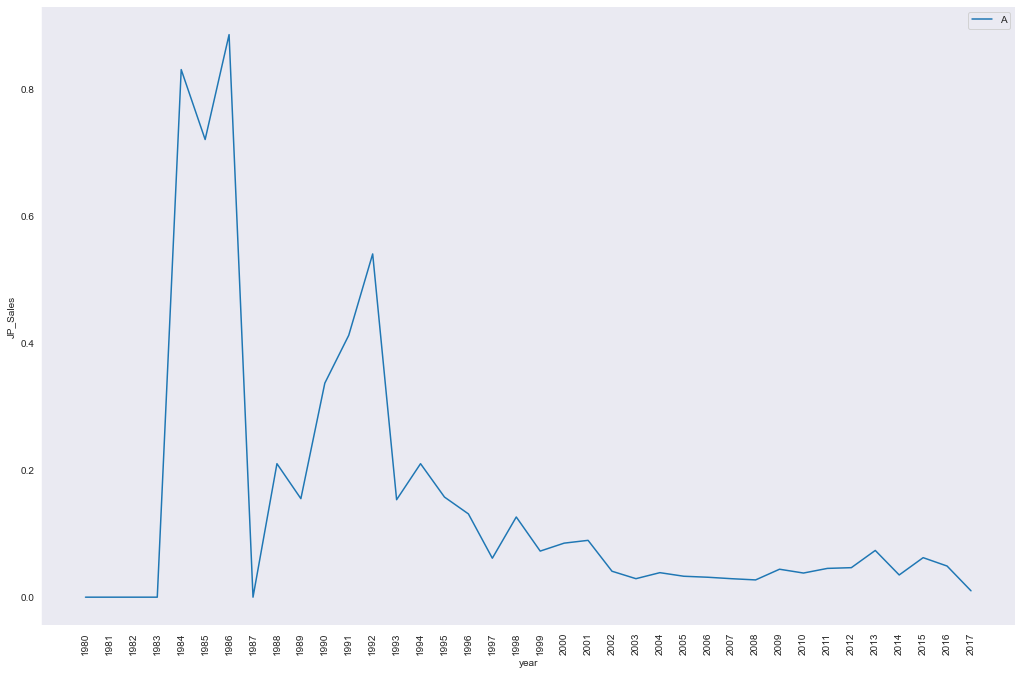

In [123]:
plot_his_sales_loc()